FY24Adopted Revenue Budget (
FY24 通过的收入预算
Revenue Category (收入类别) :收入的来源类别，如财产税、税收等.
Account (账户):具体的收入账户或来源。
·cabinet (内阁):负责该收入类别的政府内阁部门
·Department(部门):负责管理该收入来源的具体政府部门。
·FY21Actual (FY21实际) :财政年度2021的实际收入。
·FY22 Actual(FY22实际):财政年度2022的实际收入。
·FY23Appropriation (FY23拨款):财政年度2023的预算拨款或预期收入。
·FY24 Adopted(FY24通过):财政年度2024的通过或预期收入。Unnamed:8和Unnamed:9:这两个字段似乎是未命名或未使用的列，可能是文件制作过程中的遗留项。

In [1]:
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_csv('fy24-adopted-revenue-budget.csv')
df.head()

Revenue Category                   Account  Cabinet            Department  \
0  Property Tax Levy         Real Estate Taxes  Finance  Assessing Department   
1  Property Tax Levy     Personal Property Tax  Finance  Assessing Department   
2  Property Tax Levy      Property Tax Overlay  Finance  Assessing Department   
3            Excises  MV Excise - Current Year  Finance  Assessing Department   
4            Excises    MV Excise - Prior Year  Finance  Assessing Department   

     FY21 Actual    FY22 Actual FY23 Appropriation   FY24 Adopted  Unnamed: 8  \
0  2,490,082,613  2,630,469,593      2,784,133,324  2,913,736,657         NaN   
1    189,939,113    196,499,737        209,010,762    214,236,031         NaN   
2     -3,735,387    -33,174,590        -29,845,007    -30,000,000         NaN   
3     36,012,943     36,227,381         34,000,000     34,000,000         NaN   
4     15,202,795     21,692,077         17,500,000     18,000,000         NaN   

  Unnamed: 9  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [6]:
# Count of Revenue Category
category_values = df['Revenue Category'].value_counts().reset_index()
category_values.columns = ['Category', 'Count']
px.scatter(category_values, x='Category', y='Count')

In [7]:
# Count of Account
account_values = df['Account'].value_counts().reset_index()
account_values.columns = ['Account', 'Count']
px.scatter(account_values, x='Account', y='Count')

In [8]:
# Count of Cabinet
cabient_values = df['Cabinet'].value_counts().reset_index()
cabient_values.columns = ['Cabinet', 'Count']
px.scatter(cabient_values, x='Cabinet', y='Count')

In [9]:
# Count of Department
department_values = df['Department'].value_counts().reset_index()
department_values.columns = ['Department', 'Count']
px.scatter(department_values, x='Department', y='Count')

In [23]:
df.head()

Revenue Category                   Account  Cabinet            Department  \
0  Property Tax Levy         Real Estate Taxes  Finance  Assessing Department   
1  Property Tax Levy     Personal Property Tax  Finance  Assessing Department   
2  Property Tax Levy      Property Tax Overlay  Finance  Assessing Department   
3            Excises  MV Excise - Current Year  Finance  Assessing Department   
4            Excises    MV Excise - Prior Year  Finance  Assessing Department   

    FY21 Actual   FY22 Actual  FY23 Appropriation  FY24 Adopted  Unnamed: 8  \
0  2.490083e+09  2.630470e+09        2.784133e+09  2.913737e+09         NaN   
1  1.899391e+08  1.964997e+08        2.090108e+08  2.142360e+08         NaN   
2 -3.735387e+06 -3.317459e+07       -2.984501e+07 -3.000000e+07         NaN   
3  3.601294e+07  3.622738e+07        3.400000e+07  3.400000e+07         NaN   
4  1.520280e+07  2.169208e+07        1.750000e+07  1.800000e+07         NaN   

  Unnamed: 9  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [10]:
# Convert object type to float on FY21Actual、FY22 Actual、·FY23Appropriation and FY24 Adopted
for col in ['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']:
    df[col] = df[col].map(lambda x: float(x.replace(',', '')))

<Axes: >

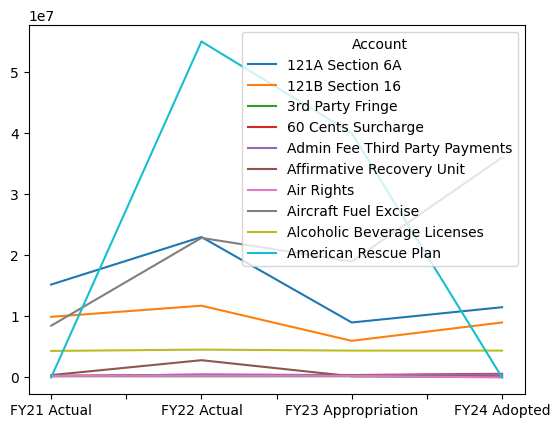

In [24]:
x = df.groupby(by=['Account']).sum()
x[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']][:10].T.plot()

<Axes: >

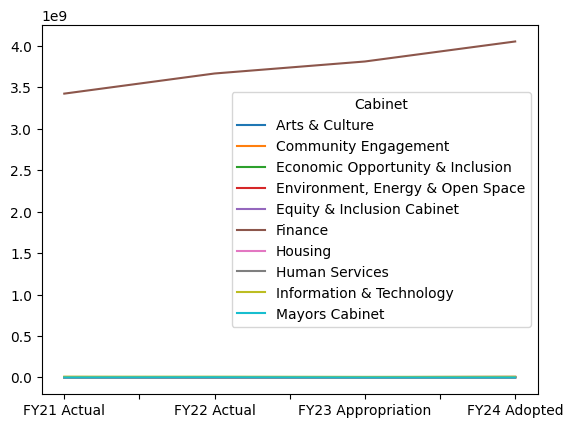

In [25]:
x = df.groupby(by=['Cabinet']).sum()
x[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']][:10].T.plot()

<Axes: >

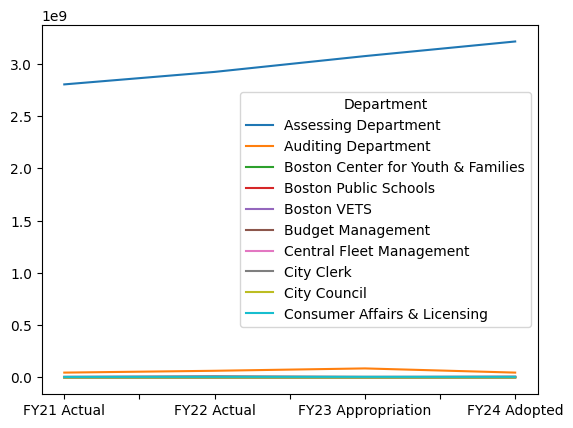

In [26]:
x = df.groupby(by=['Department']).sum()
x[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']][:10].T.plot()

<Axes: >

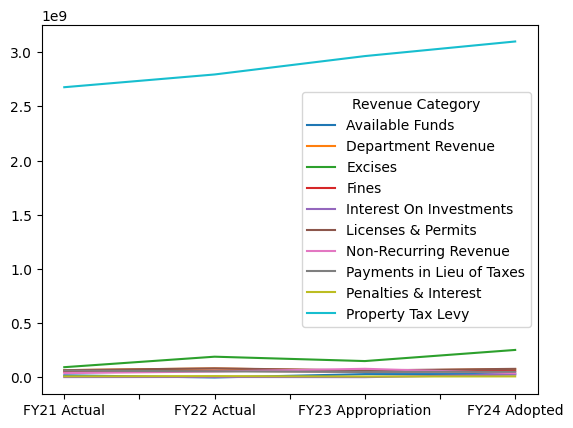

In [27]:
x = df.groupby(by=['Revenue Category']).sum()
x[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']][:10].T.plot()

<Axes: >

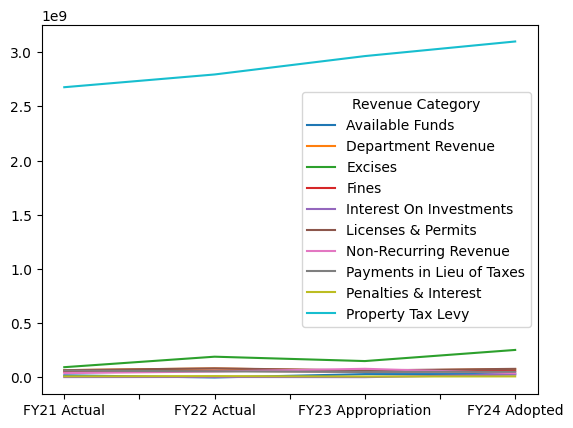

In [28]:
x = df.groupby(by=['Revenue Category']).sum()
x[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']][:10].T.plot()

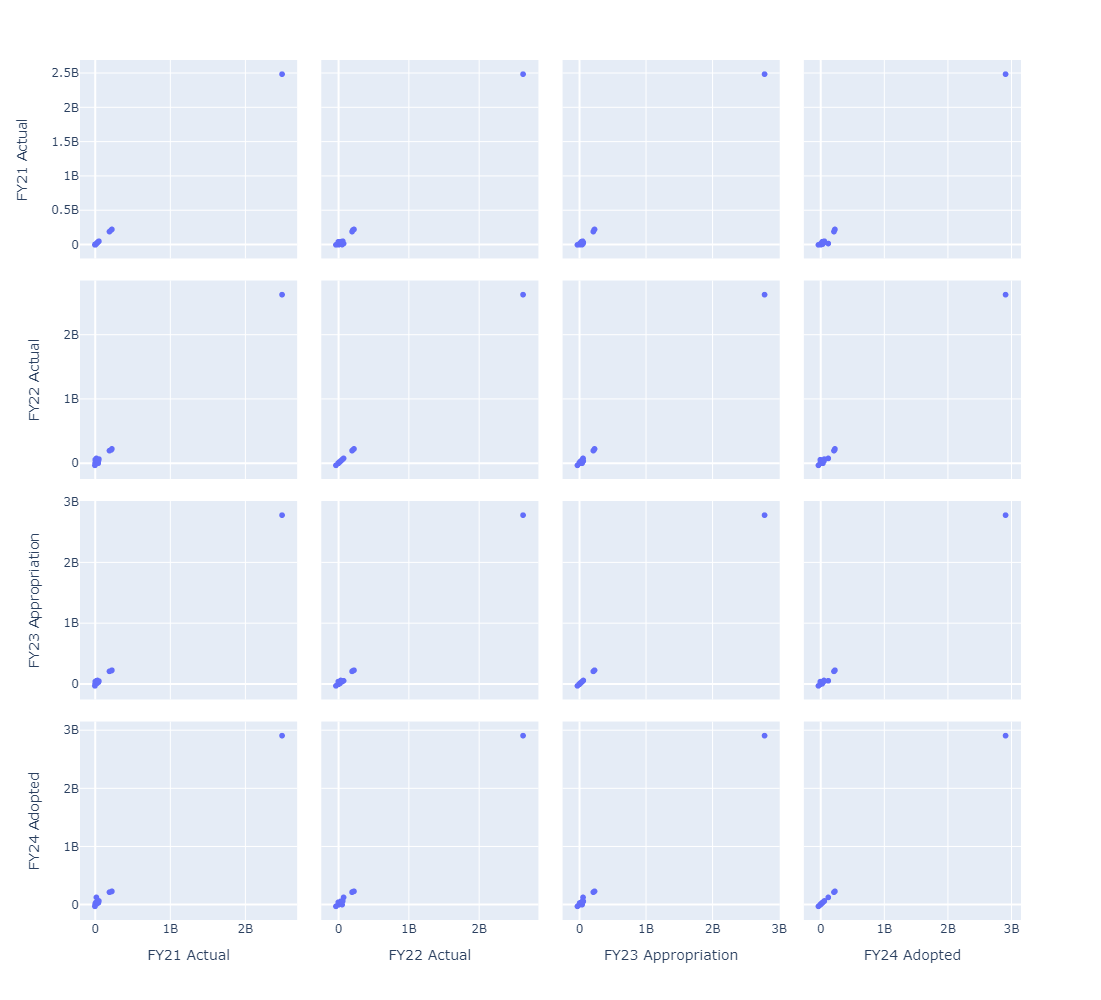

In [20]:
# Scatter matrix on FY21Actual、FY22 Actual、·FY23Appropriation and FY24 Adopted
fig = px.scatter_matrix(df[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']])
fig.update_layout(
    #title='Iris Data set',
    width=1000,
    height=1000,
)

In [10]:
# The correlation between FY21Actual、FY22 Actual、·FY23Appropriation and FY24 Adopted
corr = df[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].corr()
corr

FY21 Actual  FY22 Actual  FY23 Appropriation  FY24 Adopted
FY21 Actual            1.000000     0.999224            0.999619      0.999045
FY22 Actual            0.999224     1.000000            0.999667      0.999425
FY23 Appropriation     0.999619     0.999667            1.000000      0.999549
FY24 Adopted           0.999045     0.999425            0.999549      1.000000

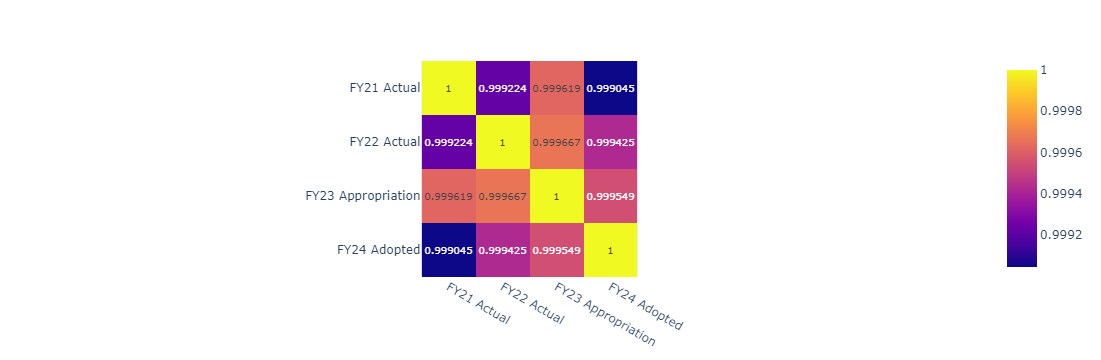

In [11]:
# The heatmap of correlation between FY21Actual、FY22 Actual、·FY23Appropriation and FY24 Adopted
# Cabinet = all
px.imshow(corr, text_auto=True)

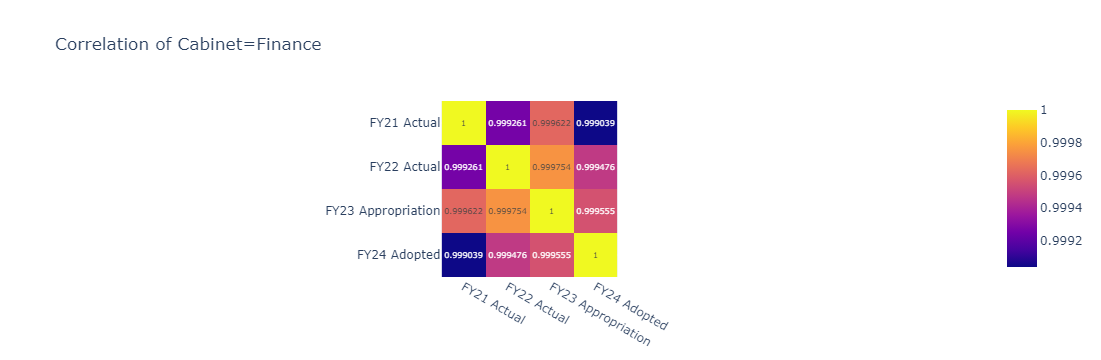

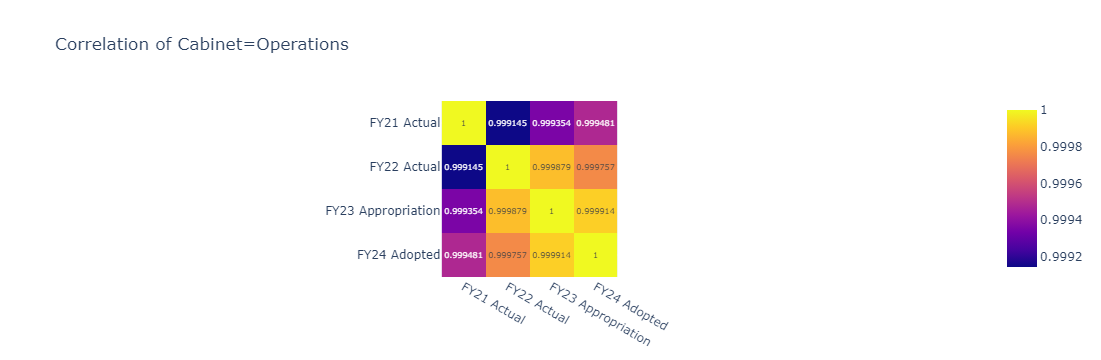

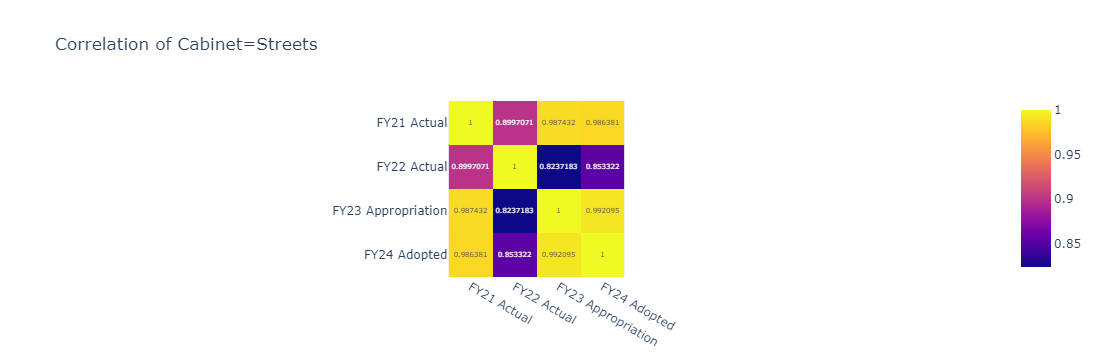

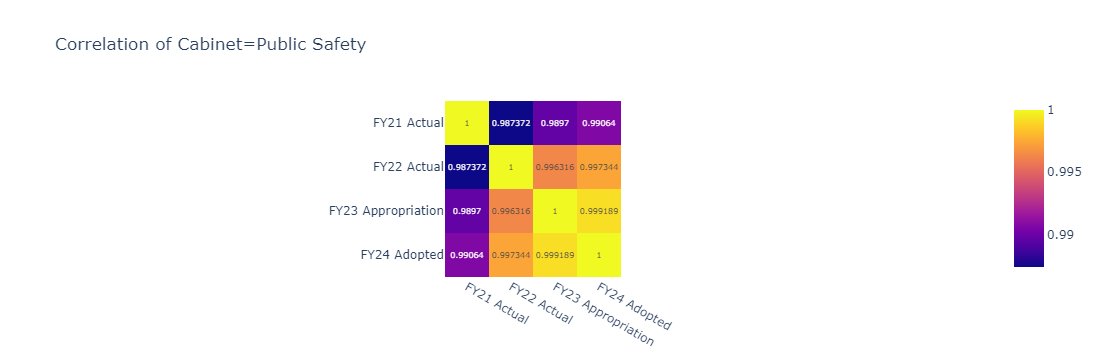

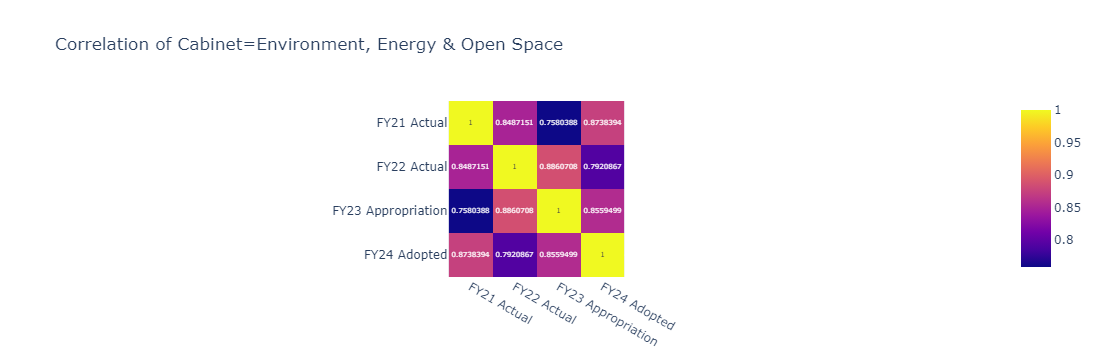

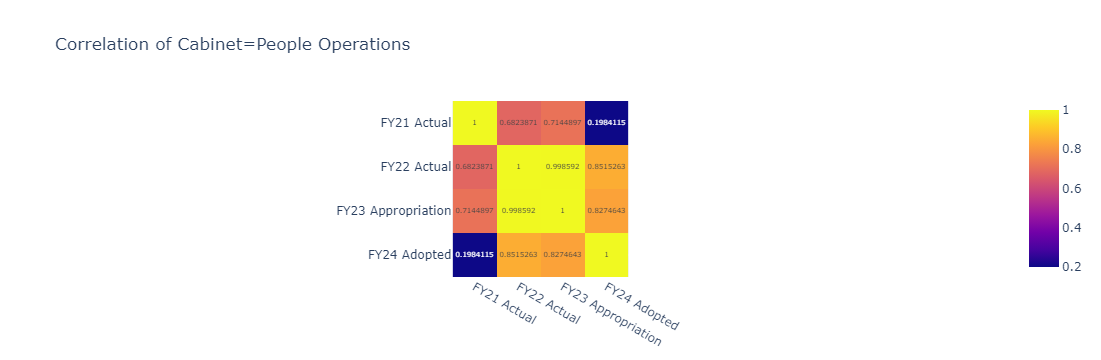

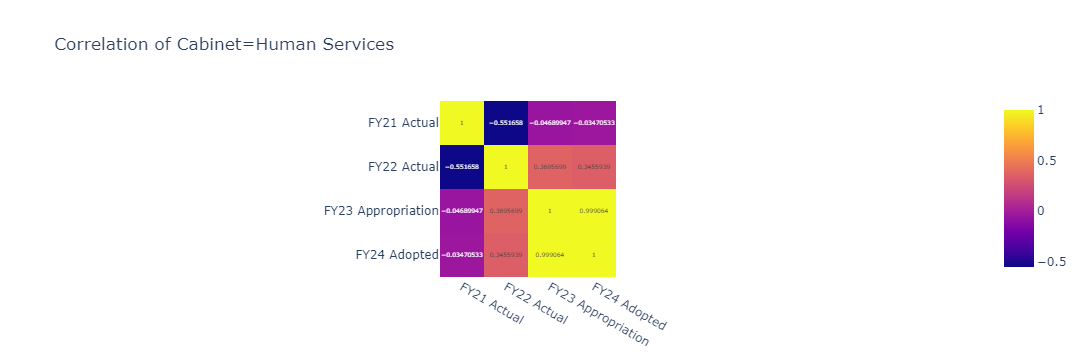

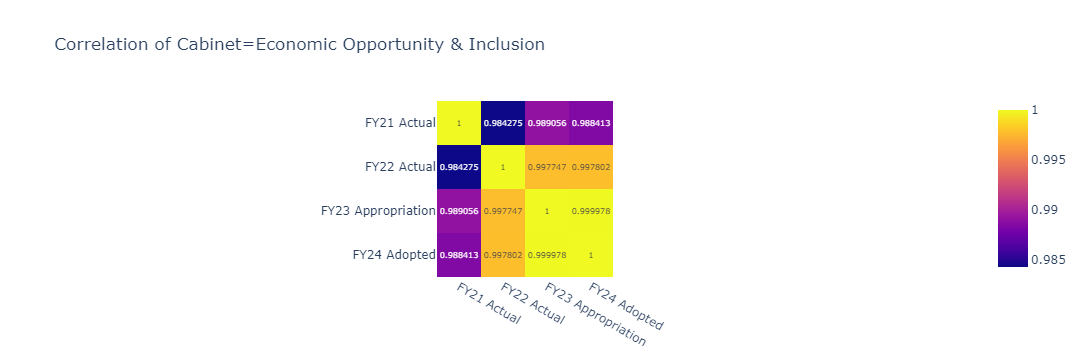

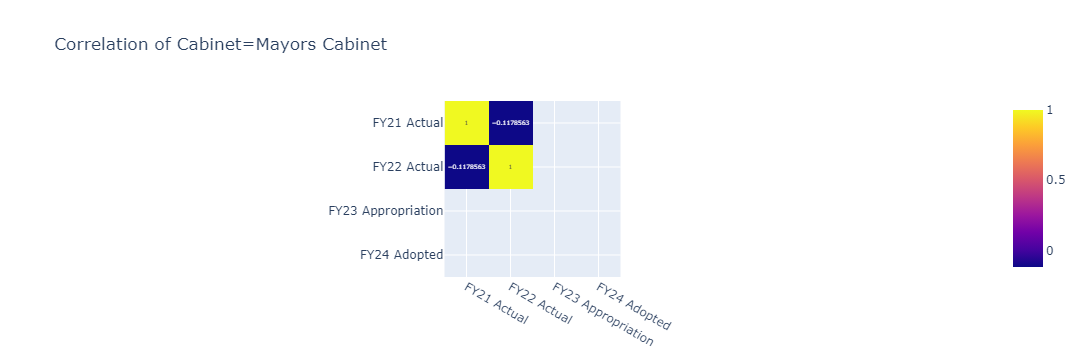

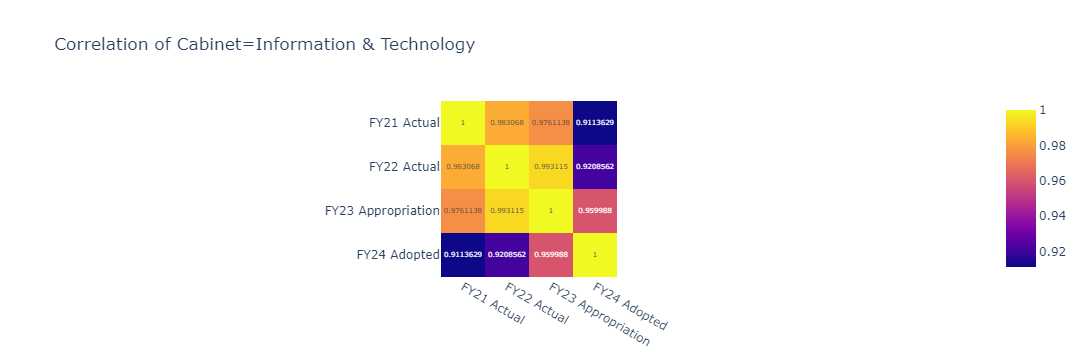

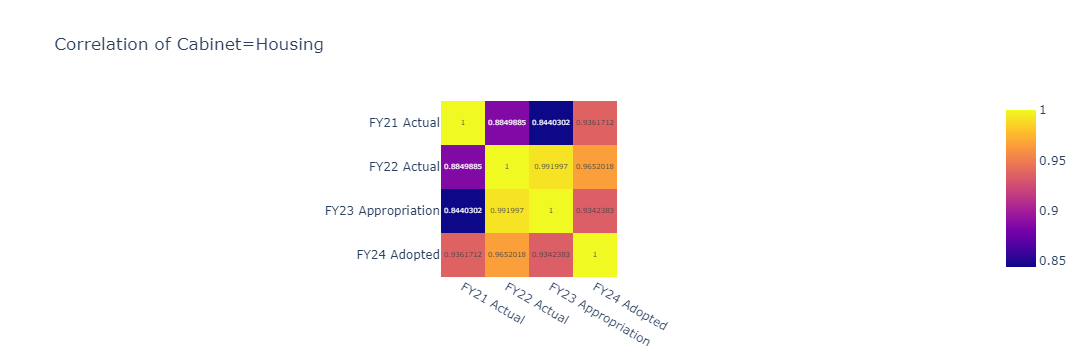

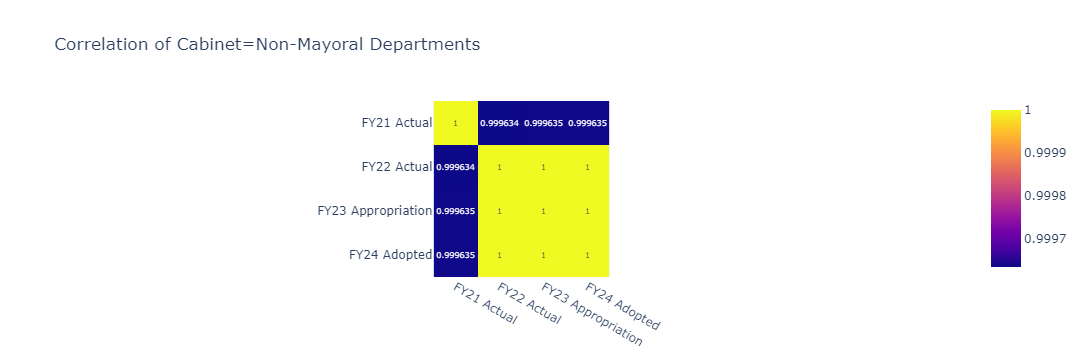

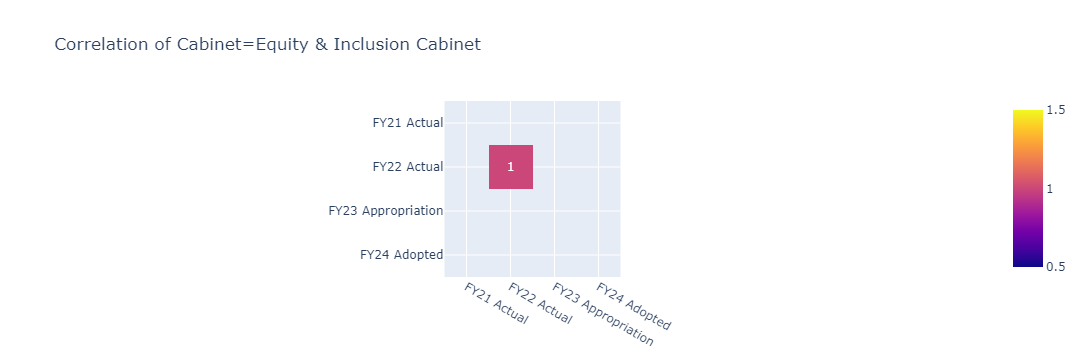

In [12]:
for cabinet in df['Cabinet'].value_counts().index:
    sub_df = df[df['Cabinet'] == cabinet]
    corr = sub_df[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].corr()
    fig = px.imshow(corr, text_auto=True, title='Correlation of Cabinet=%s' % cabinet)
    fig.show()

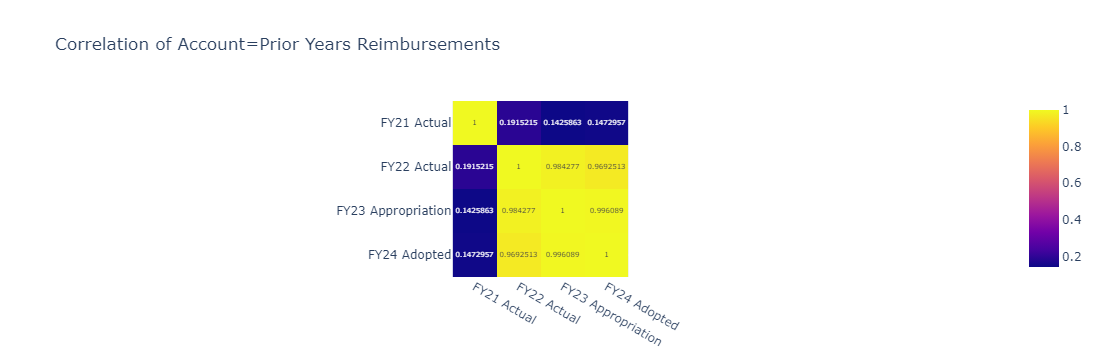

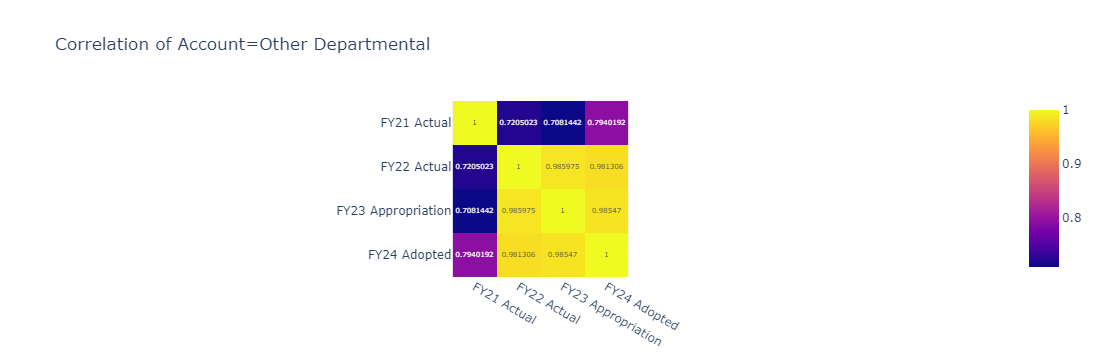

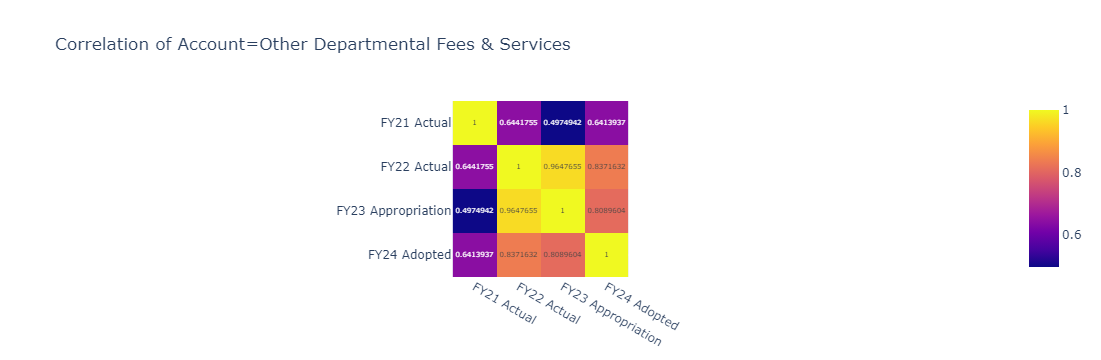

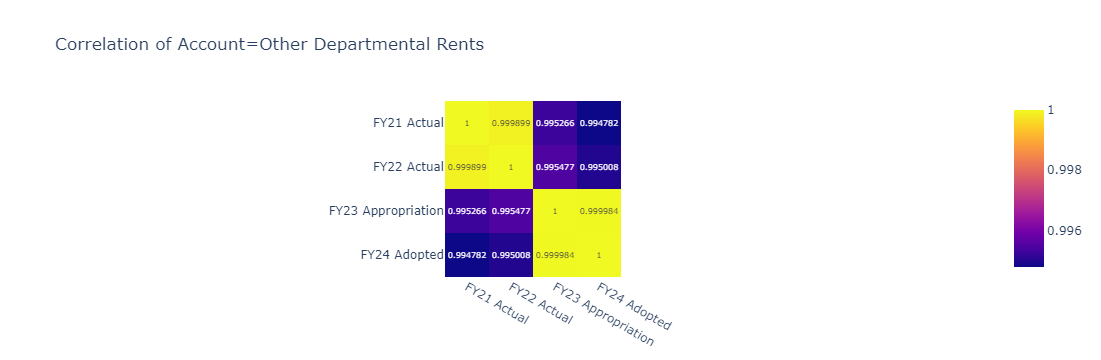

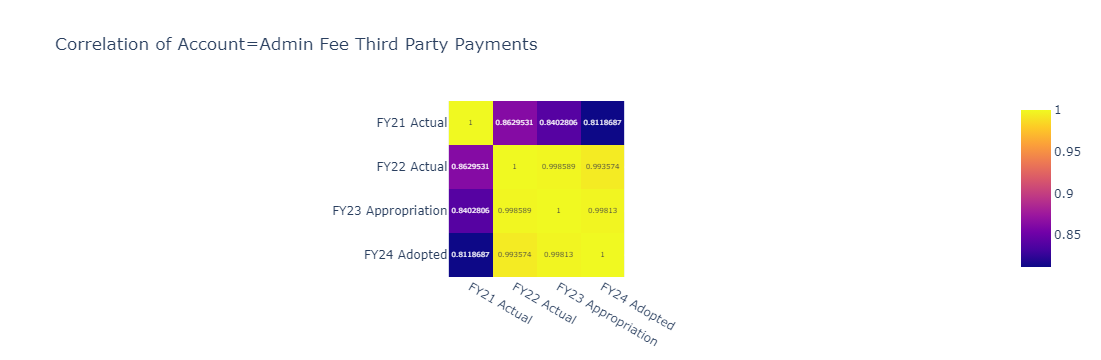

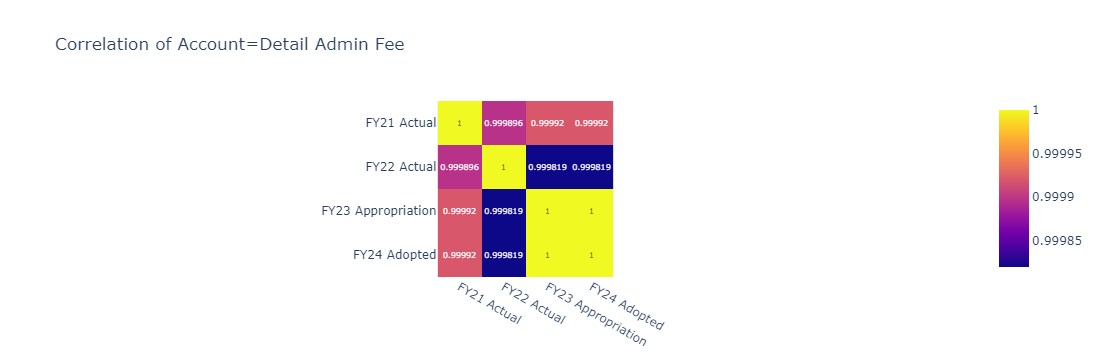

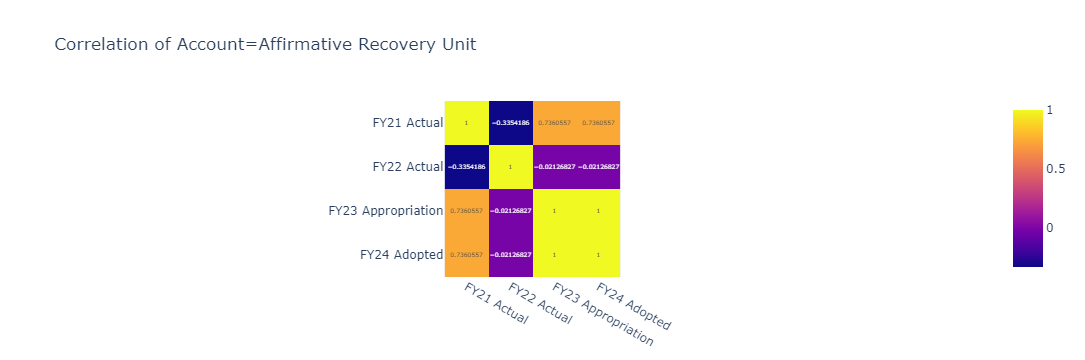

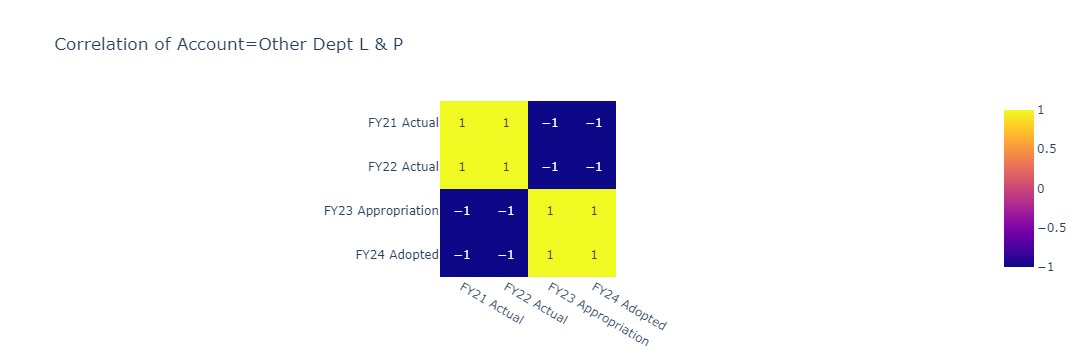

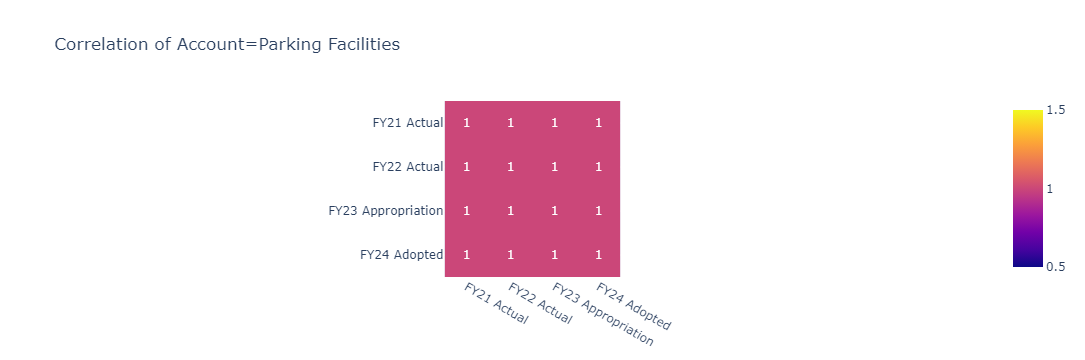

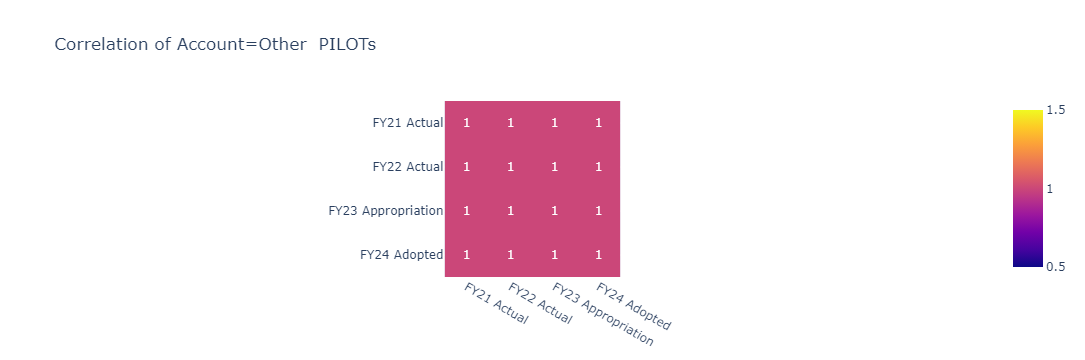

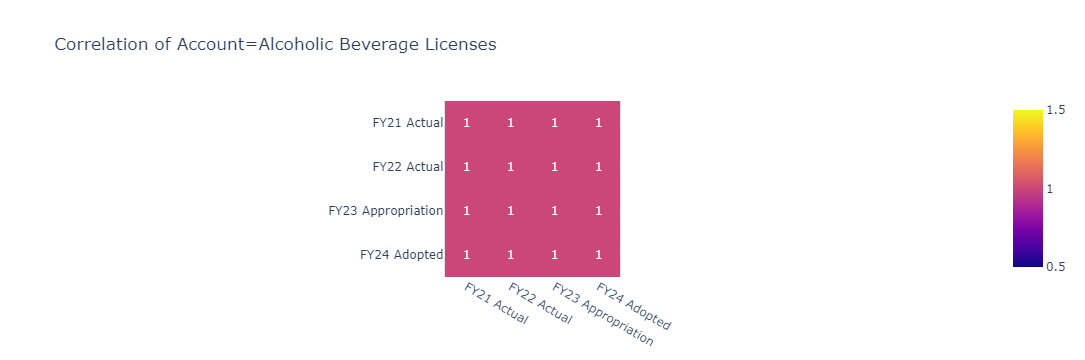

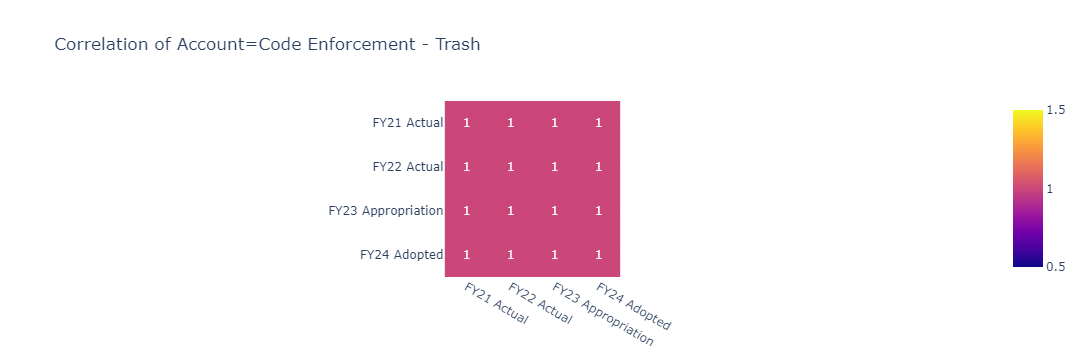

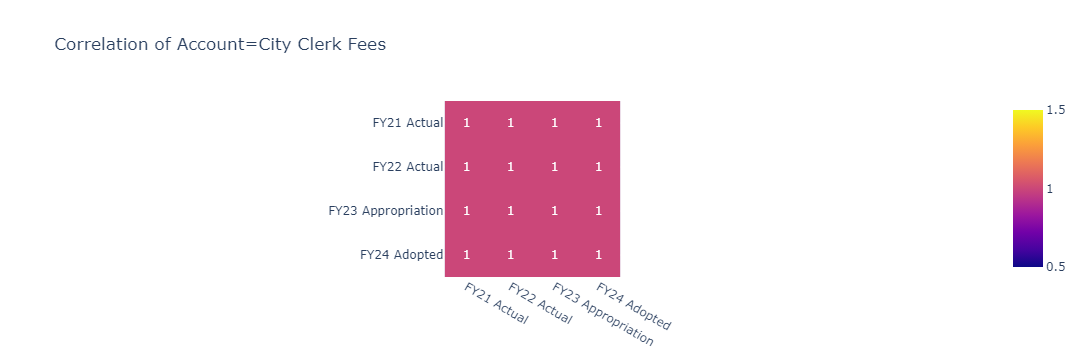

In [13]:
for account in df['Account'].value_counts().index:
    sub_df = df[df['Account'] == account]
    corr = sub_df[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].corr()
    fig = px.imshow(corr, text_auto=True, title='Correlation of Account=%s' % account)
    fig.show()